# Lasデータを用いたデータ分析

In [47]:
import laspy
import pyarrow as pa

In [19]:
las_data = "/Users/y.takagi/09LD1740.las"

In [31]:
las = laspy.read(las_data)
header = las.header
print("header:",header)
#バージョン(major changed)
print("major changed:",header.version.major)
#バージョン(minor changed)
print("minor changed:",header.version.minor)

header: <LasHeader(1.2, <PointFormat(3, 0 bytes of extra dims)>)>
major changed: 1
minor changed: 2


In [11]:
dir(header)

['DEFAULT_POINT_FORMAT',
 'DEFAULT_VERSION',
 '_OLD_LASPY_NAMES',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_point_format',
 '_prefetch_header_data',
 '_sync_extra_bytes_vlr',
 '_version',
 '_vlrs',
 'add_crs',
 'add_extra_dim',
 'add_extra_dims',
 'are_points_compressed',
 'creation_date',
 'evlrs',
 'extra_header_bytes',
 'extra_vlr_bytes',
 'file_source_id',
 'generating_software',
 'global_encoding',
 'grow',
 'major_version',
 'max_point_count',
 'maxs',
 'minor_version',
 'mins',
 'number_of_evlrs',
 'number_of_points_by_return',
 'offset_to_point_data',
 'offsets',
 'parse_crs',
 'partial_reset',
 'point_count',
 'point_fo

In [33]:
point_format = las.point_format
list(point_format.dimension_names)

['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue']

In [34]:
las.points.array

array([(-11999969, -34219882, 37713,  923, 73, 1, -5, 0, 62, 526713.367513  , 31097, 29555, 28013),
       (-11999954, -34227057, 37783,  809, 73, 1, -5, 0, 62, 526713.4741801 , 30583, 29041, 27499),
       (-11999995, -34233319, 37795,  684, 73, 1, -5, 0, 62, 526713.57418054, 28270, 26471, 24929),
       ...,
       (-11618270, -34499985, 36269, 1773, 17, 1, -8, 0, 66, 524928.37081677, 22616, 23901, 21074),
       (-11614356, -34500000, 41004,  630,  9, 1, -7, 0, 66, 524928.41749972, 19789, 20046, 18761),
       (-11613643, -34499985, 41048, 1539,  9, 1, -7, 0, 66, 524928.43083686, 20303, 20817, 19018)],
      dtype=[('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('bit_fields', 'u1'), ('raw_classification', 'u1'), ('scan_angle_rank', 'i1'), ('user_data', 'u1'), ('point_source_id', '<u2'), ('gps_time', '<f8'), ('red', '<u2'), ('green', '<u2'), ('blue', '<u2')])

In [35]:
las.X

array([-11999969, -11999954, -11999995, ..., -11618270, -11614356,
       -11613643], dtype=int32)

In [14]:
# スケール・オフセットの意味
# 座標は整数
x_first = las.X[0]
# xのスケール: 7.131602618438667e-08 -> 0.0000007
x_scale = header.x_scale
# xのoffset: -44528.753
x_offset = header.x_offset
# なので実際の座標は 531578298 * 0.0000007 + (-44528.753) = -44490.842948180776
x_coordinate = (x_first * x_scale) + x_offset
print(f"{x_first=}")
print(f"{x_scale=}")
print(f"{x_offset=}")
print(f"{x_coordinate=}")
# x_first=531578298
# x_scale=7.131602618438667e-08
# x_offset=-44528.753
# x_coordinate=-44490.842948180776

x_first=-11999969
x_scale=0.001
x_offset=-0.0
x_coordinate=-11999.969000000001


In [41]:
X_scale = header.x_scale
X_offset= header.x_offset
display(X_scale,X_offset)
X_cordinate = (las.X * X_scale)+ X_offset
display(las.X,X_cordinate)

0.001

-0.0

array([-11999969, -11999954, -11999995, ..., -11618270, -11614356,
       -11613643], dtype=int32)

array([-11999.969, -11999.954, -11999.995, ..., -11618.27 , -11614.356,
       -11613.643])

In [51]:
def GetCoordinates(las):
    X_coordinate = (las.X * header.x_offset)+header.x_offset
    Y_coordinate = (las.Y * header.y_offset)+header.y_offset
    Z_coordinate = (las.Z * header.z_offset)+header.z_offset
    return [X_cordinate,Y_coordinate,Z_coordinate]

In [52]:
len(las.X)

6152687

In [53]:
table = pa.array(GetCoordinates(las))

In [54]:
table

[
  [
    -11999.969000000001,
    -11999.954,
    -11999.995,
    -11999.951000000001,
    -11999.955,
    -11999.982,
    -11999.981,
    -11999.946,
    -11999.952000000001,
    -11999.968,
    ...
    -11674.473,
    -11665.453,
    -11663.572,
    -11657.41,
    -11657.871000000001,
    -11645.718,
    -11633.442000000001,
    -11618.27,
    -11614.356,
    -11613.643
  ],
  [
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    ...
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  [
    -0,
    -0,
    -0,
    -0,
    -0,
    -0,
    -0,
    -0,
    -0,
    -0,
    ...
    -0,
    -0,
    -0,
    -0,
    -0,
    -0,
    -0,
    -0,
    -0,
    -0
  ]
]

In [55]:
from las import LasTokyo as lt
path = "/Users/y.takagi/09LD1740.las"
obj = lt(filepath= path)

In [56]:
obj = lt(filepath= path)

In [57]:
A=obj.getCoordinates()

pyarrow.Table
x: int32
y: int32
z: int32
----
x: [[-11999969,-11999954,-11999995,-11999951,-11999955,...,-11645718,-11633442,-11618270,-11614356,-11613643]]
y: [[-34219882,-34227057,-34233319,-34259451,-34311760,...,-34499990,-34499998,-34499985,-34500000,-34499985]]
z: [[37713,37783,37795,37575,37700,...,34014,49356,36269,41004,41048]]


In [58]:
len(A["x"])

6152687

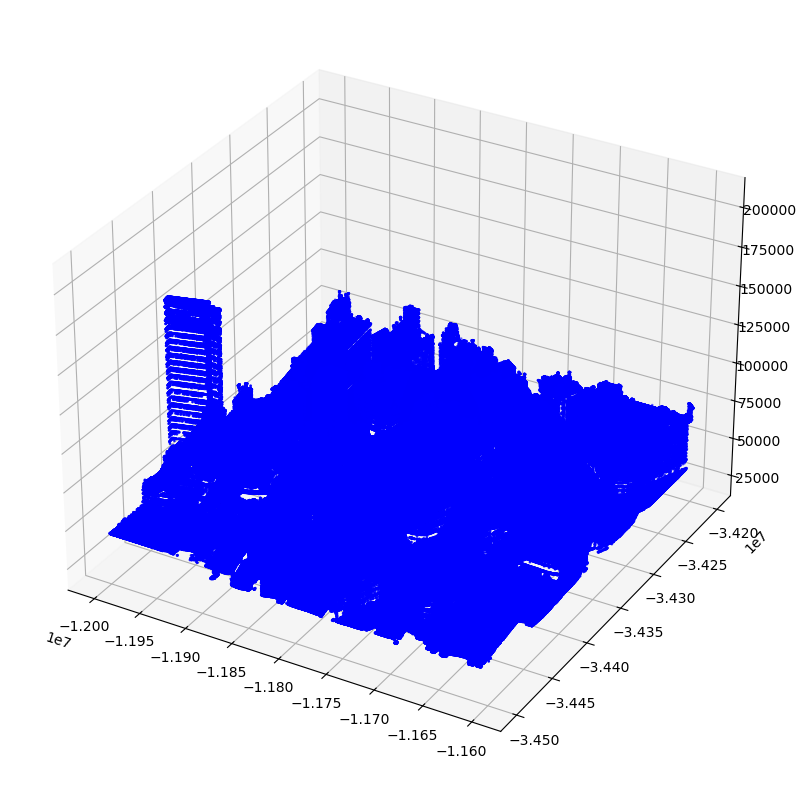

In [59]:
import matplotlib.pyplot as plt
# matplotlibで可視化
fig = plt.figure(figsize = (10, 10))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(A["x"],A["y"],A["z"], s = 1, c = "blue")
plt.show()

In [22]:
import numpy as np 
import random
def get_ball(num_points,r):
    point_cloud = []
    for i in range(num_points):
        t = random.random()
        t = np.arcsin(1-2*t)
        u= random.random() * 2 *np.pi-np.pi
        x = np.cos(t)*np.cos(u)*r
        y = np.cos(t)*np.sin(u)*r
        z= np.sin(t)*r
        point_cloud.append([x, y, z])
    return np.array(point_cloud)
#点群作成
num_points=1000
r=0.5
test_data=get_ball(num_points,r)

In [60]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 7.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 9.5 MB/s eta 0:00:00:00:0100:01


In [61]:
import open3d as o3d

#点群作成
num_points=1000
r=0.5
test_data=get_ball(num_points,r)

#numpy open3d に変換 
pcd=o3d.geometry.PointCloud()
pcd.points = o3d. utility.Vector3dVector(test_data)

# Open3dで可視化
o3d.visualization.draw_geometries([pcd])

NameError: name 'get_ball' is not defined

In [ ]:
import open3d #ライブラリのインポート

pointcloud = open3d.io.read_point_cloud("/Users/y.takagi/GitHub/bun.pcd") #点群ファイルを変数pointcloudに保存
open3d.visualization.draw_geometries([pointcloud]) #点群を画像として表示
open3d.io.write_point_cloud("output.pcd", pointcloud) #output.pcbという名前の点群ファイルを出力


[Open3D WARNING] [CheckHeader] PCD has no data.
[Open3D WARNING] Read PCD failed: unable to parse header.
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] The number of points is 0 when creating axis-aligned bounding box.
[Open3D WARNING] Write PCD failed: unable to generate header.


2024-12-30 14:15:20.903 python[77090:36976631] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-30 14:15:20.903 python[77090:36976631] +[IMKInputSession subclass]: chose IMKInputSession_Modern


False

: 